# Helping Students  "Be at the Right Place at the Right Time"


&nbsp;&nbsp;     PASSNYC is a not-for-profit organization that facilitates a collective impact that is dedicated to broadening educational opportunities for New York City's talented and underserved students. New York City is home to some of the most impressive educational institutions in the world, yet in recent years, the City’s specialized high schools - institutions with historically transformative impact on student outcomes - have seen a shift toward more homogeneous student body demographics.
     
&nbsp;&nbsp;   PASSNYC aims to increase the diversity of students taking the Specialized High School Admissions Test (SHSAT). By focusing efforts in under-performing areas that are historically underrepresented in SHSAT registration , PASSNYC  hopes to pave the path to specialized high schools for a more diverse group of students.

&nbsp;&nbsp;   PASSNYC and its partners provide "outreach services" that improve the chances of students taking the SHSAT(exam) and receiving placements in these specialized high schools(SPHS). The current process of identifying schools is effective, but PASSNYC could have an even greater impact with a more informed, granular approach to quantifying the potential for outreach at a given school. Proxies that have been good indicators of these types of schools include data on English Language Learners, Students with Disabilities, Students on Free/Reduced Lunch, and Students with Temporary Housing.

&nbsp;&nbsp;   Part of this challenge is to assess the needs of students by using publicly available data to quantify the challenges they face in taking the SHSAT. The solution will enable PASSNYC to identify the schools where minority and underserved students stand to gain the most from services like after school programs, test preparation, mentoring, or resources for parents.
     


In [75]:
# Import the necessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns;sns.set(color_codes=True)

import  plotly.plotly  as py
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score , average_precision_score
from sklearn.metrics import precision_score, precision_recall_curve
%matplotlib inline




In [76]:
#Dataset:
# <<< PASSNYC has shared 2016 School Explorer data which has all the demographic and other relevant data about the NYC schools,
# contained in 1272 Rows and x 161columns, assigned to the df ' school'. 
# In addition to that, it has also shared District 5‘s SHSAT exam Registrations and Testers details in 140*7 R * C( 'schools')
# Columns from both of the above files comprise the Feature variables(independent variables)
# I am  using publicly available data from City of New York’s publicly available data at NYC data, which has SHSAT offer 
# details for three academic years(shsat_1*1*  files), which give details of the number of students in the school, 
# the number of students taking the test and the number of students receiving offers( a combination of these columns are 
#the ones that I use to arrive at the dependent variable)
# >>>
pd.set_option('display.max_columns', None)  
school = pd.read_csv('2016 School Explorer.csv')
schools = pd.read_csv('2013_-_2018_Demographic_Snapshot_School.csv')
shsat_1718 = pd.read_csv('2017-2018_SHSAT_Admissions_Test_Offers_By_Sending_School.csv')
shsat_1617 = pd.read_csv('2016-2017_SHSAT_Admissions_Test_Offers_By_Sending_School.csv')
shsat_1516 = pd.read_csv('2015-2016_SHSAT_Admissions_Test_Offers_By_Sending_School.csv')
school=school.loc[school['Grade High']== '08']
school.drop(['Adjusted Grade','New?','Other Location Code in LCGMS','SED Code','Grades','Grade Low','Grade High','Percent ELL','Percent Asian','Percent Black','Percent Hispanic','Percent Black / Hispanic','Percent White','Grade 3 ELA - All Students Tested','Grade 3 ELA 4s - All Students','Grade 3 ELA 4s - American Indian or Alaska Native','Grade 3 ELA 4s - Black or African American','Grade 3 ELA 4s - Hispanic or Latino','Grade 3 ELA 4s - Asian or Pacific Islander','Grade 3 ELA 4s - White','Grade 3 ELA 4s - Multiracial','Grade 3 ELA 4s - Limited English Proficient','Grade 3 ELA 4s - Economically Disadvantaged','Grade 3 Math - All Students tested','Grade 3 Math 4s - All Students','Grade 3 Math 4s - American Indian or Alaska Native','Grade 3 Math 4s - Black or African American','Grade 3 Math 4s - Hispanic or Latino','Grade 3 Math 4s - Asian or Pacific Islander','Grade 3 Math 4s - White','Grade 3 Math 4s - Multiracial','Grade 3 Math 4s - Limited English Proficient','Grade 3 Math 4s - Economically Disadvantaged','Grade 4 ELA - All Students Tested','Grade 4 ELA 4s - All Students','Grade 4 ELA 4s - American Indian or Alaska Native','Grade 4 ELA 4s - Black or African American','Grade 4 ELA 4s - Hispanic or Latino','Grade 4 ELA 4s - Asian or Pacific Islander','Grade 4 ELA 4s - White','Grade 4 ELA 4s - Multiracial','Grade 4 ELA 4s - Limited English Proficient','Grade 4 ELA 4s - Economically Disadvantaged','Grade 4 Math - All Students Tested','Grade 4 Math 4s - All Students','Grade 4 Math 4s - American Indian or Alaska Native','Grade 4 Math 4s - Black or African American','Grade 4 Math 4s - Hispanic or Latino','Grade 4 Math 4s - Asian or Pacific Islander','Grade 4 Math 4s - White','Grade 4 Math 4s - Multiracial','Grade 4 Math 4s - Limited English Proficient','Grade 4 Math 4s - Economically Disadvantaged','Grade 5 ELA - All Students Tested','Grade 5 ELA 4s - All Students','Grade 5 ELA 4s - American Indian or Alaska Native','Grade 5 ELA 4s - Black or African American','Grade 5 ELA 4s - Hispanic or Latino','Grade 5 ELA 4s - Asian or Pacific Islander','Grade 5 ELA 4s - White','Grade 5 ELA 4s - Multiracial','Grade 5 ELA 4s - Limited English Proficient','Grade 5 ELA 4s - Economically Disadvantaged','Grade 5 Math - All Students Tested','Grade 5 Math 4s - All Students','Grade 5 Math 4s - American Indian or Alaska Native','Grade 5 Math 4s - Black or African American','Grade 5 Math 4s - Hispanic or Latino','Grade 5 Math 4s - Asian or Pacific Islander','Grade 5 Math 4s - White','Grade 5 Math 4s - Multiracial','Grade 5 Math 4s - Limited English Proficient','Grade 5 Math 4s - Economically Disadvantaged','Grade 6 ELA - All Students Tested','Grade 6 ELA 4s - All Students','Grade 6 ELA 4s - American Indian or Alaska Native','Grade 6 ELA 4s - Black or African American','Grade 6 ELA 4s - Hispanic or Latino','Grade 6 ELA 4s - Asian or Pacific Islander','Grade 6 ELA 4s - White','Grade 6 ELA 4s - Multiracial','Grade 6 ELA 4s - Limited English Proficient','Grade 6 ELA 4s - Economically Disadvantaged','Grade 6 Math - All Students Tested','Grade 6 Math 4s - All Students','Grade 6 Math 4s - American Indian or Alaska Native','Grade 6 Math 4s - Black or African American','Grade 6 Math 4s - Hispanic or Latino','Grade 6 Math 4s - Asian or Pacific Islander','Grade 6 Math 4s - White','Grade 6 Math 4s - Multiracial','Grade 6 Math 4s - Limited English Proficient','Grade 6 Math 4s - Economically Disadvantaged','Grade 7 ELA - All Students Tested','Grade 7 ELA 4s - All Students','Grade 7 ELA 4s - American Indian or Alaska Native','Grade 7 ELA 4s - Black or African American','Grade 7 ELA 4s - Hispanic or Latino','Grade 7 ELA 4s - Asian or Pacific Islander','Grade 7 ELA 4s - White','Grade 7 ELA 4s - Multiracial','Grade 7 ELA 4s - Limited English Proficient','Grade 7 ELA 4s - Economically Disadvantaged','Grade 7 Math - All Students Tested','Grade 7 Math 4s - All Students','Grade 7 Math 4s - American Indian or Alaska Native','Grade 7 Math 4s - Black or African American','Grade 7 Math 4s - Hispanic or Latino','Grade 7 Math 4s - Asian or Pacific Islander','Grade 7 Math 4s - White','Grade 7 Math 4s - Multiracial','Grade 7 Math 4s - Limited English Proficient','Grade 7 Math 4s - Economically Disadvantaged' ],axis =1, inplace = True)
def stripsoff(x):
    return float(x.strip('%'))

def stripsoff_dollar(x):
    return str(x.strip('$'))

school["Student Attendance Rate"] = school["Student Attendance Rate"].astype(str).apply(stripsoff)
school["Percent of Students Chronically Absent"] = school["Percent of Students Chronically Absent"].astype(str).apply(stripsoff)
school["Rigorous Instruction %"] = school["Rigorous Instruction %"].astype(str).apply(stripsoff)
school["Collaborative Teachers %"] = school["Collaborative Teachers %"].astype(str).apply(stripsoff)
school["Supportive Environment %"] = school["Supportive Environment %"].astype(str).apply(stripsoff)
school["Effective School Leadership %"] = school["Effective School Leadership %"].astype(str).apply(stripsoff)
school["Strong Family-Community Ties %"] = school["Strong Family-Community Ties %"].astype(str).apply(stripsoff)
school["Trust %"] = school["Trust %"].astype(str).apply(stripsoff)
school['School Income Estimate']=school['School Income Estimate'].replace({'\$':'', ',':''},regex=True).astype(float)

school=school.replace(to_replace='Exceeding Target',value='1',regex=True)
school=school.replace(to_replace='Meeting Target',value='2',regex=True)
school=school.replace(to_replace='Approaching Target',value='3',regex=True)
school=school.replace(to_replace='Not 2',value='2',regex=True)
school.fillna('0', inplace=True)



In [77]:
#  I select Grade 8 students , as SHSAT exam is taken by the 8th Graders in middleschools for gaining admission to 
# Specialized High Schools(SPHS)


schools_df = schools.loc[(schools['Grade 8'] != 0)]
schools_df= schools_df[schools_df['Economic Need Index'] !='No Data']


# Preparing the Data

In [78]:
# As part of preparing the data for analysis, cleaning has to be done, 
# including removing % and $ signs and converting them to numeric fields and dropping redundant columns that do not contribute

def stripsoff(x):
    return float(x.strip('%'))


schools_df["Economic Need Index"] = schools_df["Economic Need Index"].astype(str).apply(stripsoff)
schools_df.loc[schools_df["Economic Need Index"] == 0, "Economic Need Index"] = schools_df["Economic Need Index"].mean()


schools_df["% Female"] = schools_df["% Female"].astype(str).apply(stripsoff)
schools_df["% Male"] = schools_df["% Male"].astype(str).apply(stripsoff)
schools_df["% Asian"] = schools_df["% Asian"].astype(str).apply(stripsoff)
schools_df["% Black"] = schools_df["% Black"].astype(str).apply(stripsoff)
schools_df["% Hispanic"] = schools_df["% Hispanic"].astype(str).apply(stripsoff)
schools_df["% White"] = schools_df["% White"].astype(str).apply(stripsoff)
schools_df["% English Language Learners"] = schools_df["% English Language Learners"].astype(str).apply(stripsoff)
schools_df["% Poverty"] = schools_df["% Poverty"].astype(str).apply(stripsoff)
schools_df["% Multiple Race Categories Not Represented"] = schools_df["% Multiple Race Categories Not Represented"].astype(str).apply(stripsoff)
schools_df["% Students with Disabilities"] = schools_df["% Students with Disabilities"].astype(str).apply(stripsoff)

schools_df["% Black + Hispanic"] = schools_df["% Black"] + schools_df["% Hispanic"]
schools_df["Bl+Hi_Grade8"] = (schools_df["% Black + Hispanic"] * schools_df["Grade 8"]) / 100
schools_df["Bl+Hi_Grade8"] = schools_df["Bl+Hi_Grade8"].round()

schools_df["% Asian + White"] = schools_df["% Asian"] + schools_df["% White"]
schools_df["As+Wh_Grade8"] = (schools_df["% Asian + White"] * schools_df["Grade 8"]) / 100
schools_df["As+Wh_Grade8"] = schools_df["As+Wh_Grade8"].round()
schools_df["% Others"] =(100-(schools_df["% Black"] + schools_df["% Hispanic"] + schools_df["% White"] + schools_df["% Asian"])).round()
schools_df =pd.merge(schools_df, 
                  school,
                  left_on= ['DBN'],
                  right_on=['Location Code'],
                  how='left')
schools_df.drop(['Grade K','Grade 1','Grade 2','Grade 3','Grade 4','Grade 5','Grade 6','Grade 7','Grade 9','Grade 10','Grade 11','Grade 12'],axis =1, inplace = True)
schools_df.dropna()
schools_df=schools_df.replace(to_replace='Not 2',value='2',regex=True)




In [79]:
# The ratio of "count of offers" received by a school to the total number of 8th Graders in the school , calculated as the
# 'Training_Need_Score' is a good indicator of the school's position in the total list of middle schools and this score would help 
#  PASSNYC decide which schools to focus on for training the capable students. 
# The ratio of  "count of testers" in a school to the total number of 8th Graders in the school, calculated as the
# 'Awareness_Need_Score' gives an idea of the popularity of the program amongst the students  and  would help PASSNYC focus 
# on which schools to focus for getting more capable students to take the tests


shsat_1516["Year"] = '2015-16'
shsat_1516.loc[shsat_1516["Count of Offers"] == "0-5", "Count of Offers"] = "0"
shsat_1516.loc[shsat_1516["Count of Testers"] == "0-5", "Count of Testers"] = "0"
shsat_1516.loc[shsat_1516["Count of Students in HS Admissions"] == "0-5", "Count of Students in HS Admissions"] = "0"
shsat_1516["Training_Need_Score"] = (shsat_1516["Count of Offers"].astype(float) / shsat_1516["Count of Students in HS Admissions"].astype(float))*100
shsat_1516["Training_Need_Score"] = shsat_1516["Training_Need_Score"].round()
shsat_1516 = shsat_1516.dropna(subset= ['Training_Need_Score'])

shsat_1617["Year"] = '2016-17'
shsat_1617.loc[shsat_1617["Count of Offers"] == "0-5", "Count of Offers"] = "0"
shsat_1617.loc[shsat_1617["Count of Testers"] == "0-5", "Count of Testers"] = "0"
shsat_1617.loc[shsat_1617["Count of Students in HS Admissions"] == "0-5", "Count of Students in HS Admissions"] = "0"
shsat_1617["Training_Need_Score"] = (shsat_1617["Count of Offers"].astype(float) / shsat_1617["Count of Students in HS Admissions"].astype(float))*100
shsat_1617["Training_Need_Score"] = shsat_1617["Training_Need_Score"].round()
shsat_1617 = shsat_1617.dropna(subset= ['Training_Need_Score'])


shsat_1718["Year"] = '2017-18'
shsat_1718.loc[shsat_1718["Count of Offers"] == "0-5", "Count of Offers"] = "0"
shsat_1718.loc[shsat_1718["Count of Testers"] == "0-5", "Count of Testers"] = "0"
shsat_1718.loc[shsat_1718["Count of Students in HS Admissions"] == "0-5", "Count of Students in HS Admissions"] = "0"
shsat_1718["Training_Need_Score"] = (shsat_1718["Count of Offers"].astype(float) / shsat_1718["Count of Students in HS Admissions"].astype(float))*100
shsat_1718["Training_Need_Score"] = shsat_1718["Training_Need_Score"].round()
shsat_1718 = shsat_1718.dropna(subset= ['Training_Need_Score'])

shsat = [shsat_1516, shsat_1617, shsat_1718]
shsat_df = pd.concat(shsat, sort = True)


shsat_df.loc[shsat_df["Count of Offers"] == "0-5", "Count of Offers"] = "0"
shsat_df.loc[shsat_df["Count of Testers"] == "0-5", "Count of Testers"] = "0"
shsat_df.loc[shsat_df["Count of Students in HS Admissions"] == "0-5", "Count of Students in HS Admissions"] = "0"
shsat_df["Awareness_Need_Score"] = (shsat_df["Count of Testers"].astype(float) / shsat_df["Count of Students in HS Admissions"].astype(float))*100
shsat_df["Awareness_Need_Score"] = shsat_df["Awareness_Need_Score"].round(2)
shsat_df["Training_Need_Score"] = (shsat_df["Count of Offers"].astype(float) / shsat_df["Count of Students in HS Admissions"].astype(float))*100
shsat_df["Training_Need_Score"] = shsat_df["Training_Need_Score"].round(2)



shsat_df = shsat_df.dropna(subset= ['Training_Need_Score'])
shsat_df = shsat_df.dropna(subset= ['Awareness_Need_Score'])
shsat_df.sort_values("Feeder School DBN",inplace=True)





In [80]:
school_merg = pd.merge(schools_df, 
                  shsat_df,
                  left_on= ['DBN'],
                  right_on=['Feeder School DBN'],
                  how='left')
                  
school_merg=school_merg.loc[(school_merg['Year_x']=='2016-17') & (school_merg['Year_y']=='2016-17')]
school_merg.fillna(0, inplace=True)




In [81]:
school_merg.loc[school_merg['Training_Need_Score'] != 0, "School_type"] = "Feeder"

school_merg.loc[school_merg['Training_Need_Score'] == 0, "School_type"] = "Non_Feeder"
Feeder_schools_df = school_merg.loc[school_merg['Training_Need_Score'] != 0] 
Non_feeder_schools_df =  school_merg.loc[school_merg['Training_Need_Score'] == 0]
Feeder_Schools= school_merg[school_merg['School_type']=='Feeder']
Non_Feeder_Schools = school_merg[school_merg['School_type'] =='Non_Feeder']


There are two parts to the identification process of the candidate schools.
One part is to identify schools where the awareness of SHSAT is less and  there are not many test takers.  In such schools PASSNYC can do awareness programs and socializations to increase awareness.
Second part of the project is to increase the success rate in schools where students are curerntly taking the  SHSAT test but wihtout good results.For such schools, the program can plan on conducting training  and other specialised programs for the candidates.
To measure these two criteria , I have introduced two scores , Need_Awareness_Score and Need_Training_Score.
Need_Awareness_Score is calculated as the ratio of the  'number of test takers in the school' to the ' total number of students in the school' . This gives a clear idea of how popular the program is amongst the students of the school.

Need_Training_Score is calculated as the ration of the 'number of offers received in a school' to the total number of students in the school', with a lower score indicating  more training requirement for the school.

The schools can be broadly classified into  Feeder schools and Non- feeder schools based on whether students get admission to SPHS from these schools  through SHSAT tests.  Then an anlysis has been done on the demographics of both these categories to explore presence of any patterns  with respect to ethnicity, Economic Need Index, sex etc.



## Economic Need Index Distribution in Feeder and Non Feeder Schools

Text(0,0.5,'Density')

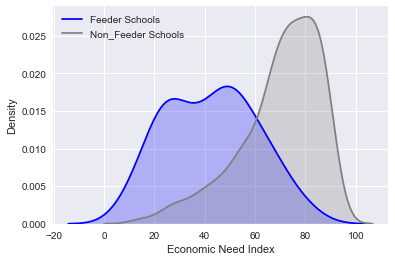

In [82]:
sns.kdeplot(Feeder_Schools['Economic Need Index_x'],shade= True, color ='blue',label='Feeder Schools')
sns.kdeplot(Non_Feeder_Schools['Economic Need Index_x'],shade= True, color ='grey', label ='Non_Feeder Schools')
plt.xlabel('Economic Need Index')
plt.ylabel('Density')

## Black and Hispanic Population Distribution in Feeder and Non- Feeder Schools

Text(0,0.5,'Density')

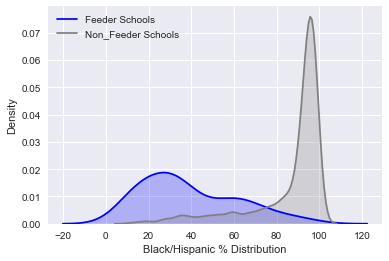

In [83]:
sns.kdeplot(Feeder_Schools['% Black + Hispanic'],shade= True, color ='blue',label='Feeder Schools')
sns.kdeplot(Non_Feeder_Schools['% Black + Hispanic'],shade= True, color ='grey', label ='Non_Feeder Schools')
plt.xlabel('Black/Hispanic % Distribution')
plt.ylabel('Density')


Text(0.5,0,'Black-Hispanic Distribution')

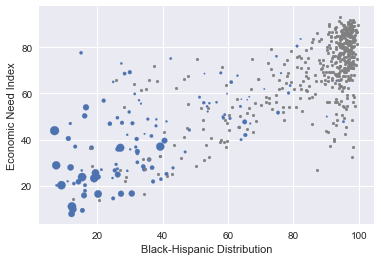

In [84]:
plt.scatter(Feeder_Schools['% Black + Hispanic'],Feeder_Schools['Economic Need Index_x'],s=Feeder_Schools['Training_Need_Score'])
plt.scatter(Non_Feeder_Schools['% Black + Hispanic'],Non_Feeder_Schools['Economic Need Index_x'], color='grey', s=8)
plt.ylabel('Economic Need Index')
plt.xlabel('Black-Hispanic Distribution')

In [85]:
np.corrcoef(school_merg["% Black + Hispanic"], school_merg["Economic Need Index_x"])

array([[1.        , 0.78797633],
       [0.78797633, 1.        ]])

The scatterplot above visualizes the positive correlation (r = 0.79) between Economic Need Index and % Black and Hispanic student population. 
Feeder schools with more students admitted to Specilaised High Schools(SPHS) (blue points) tend to have low-to-medium economic need and lower proportion of Black or Hispanic students, while a noticeable number of non-feeder schools (gray points) cluster around the upper right corner of the plot. In other words, students from these non-feeder schools are mostly low-income Hispanic or Black student that are underrepresented at SPHS.

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [87]:
# I classify the  Training_Need_Score and Awareness_Need_Score of the schools to 
# 0 and 1 in order to make the target variable a classifier.
# And then proceed to use RandomForestClassifier to do Feature Selection, as there
# are close to 100 Feature variables and Feature importance can be done and Features prioritsed using this

Training_List = school_merg
Training_List['TRNG_Score'] = Training_List['Training_Need_Score'].map(lambda s: 1 if s != 0 else 0)
Training_List['AWS_Score'] = Training_List['Awareness_Need_Score'].map(lambda s: 1 if s >= 60 else 0)

rnd_clf = RandomForestClassifier(n_estimators = 100 , criterion = 'entropy',random_state = 0)
rnd_clf.fit(Training_List.iloc[:,41:80],Training_List.iloc[:,90]);




In [88]:
x, y = (list(x) for x in zip(*sorted(zip(rnd_clf.feature_importances_, Training_List.iloc[:,41:80].columns), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importance',
     width = 900, height = 3000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
),
    margin=dict(
    l=300,
),
)

fig1 = go.Figure(data=[trace2], layout=layout)
iplot(fig1)

In [89]:
for name, importance in zip(Training_List.iloc[:,41:80].columns, rnd_clf.feature_importances_):
    if importance > 0.015:
        print('"' + name + '"'+',')

"Economic Need Index_y",
"School Income Estimate",
"Student Attendance Rate",
"Percent of Students Chronically Absent",
"Rigorous Instruction %",
"Collaborative Teachers %",
"Supportive Environment %",
"Effective School Leadership %",
"Strong Family-Community Ties %",
"Trust %",
"Average ELA Proficiency",
"Average Math Proficiency",
"Grade 8 ELA - All Students Tested",
"Grade 8 ELA 4s - All Students",
"Grade 8 ELA 4s - Black or African American",
"Grade 8 ELA 4s - Hispanic or Latino",
"Grade 8 ELA 4s - Asian or Pacific Islander",
"Grade 8 ELA 4s - White",
"Grade 8 ELA 4s - Economically Disadvantaged",
"Grade 8 Math - All Students Tested",
"Grade 8 Math 4s - All Students",


In [90]:
Training_Model = Training_List[["School Name_x",
"Economic Need Index_y",
"School Income Estimate",
"Student Attendance Rate",
"Percent of Students Chronically Absent",
"Rigorous Instruction %",
"Collaborative Teachers %",
"Supportive Environment %",
"Effective School Leadership %",
"Strong Family-Community Ties %",
"Trust %",
"Average ELA Proficiency",
"Average Math Proficiency",
"Grade 8 ELA - All Students Tested",
"Grade 8 ELA 4s - All Students",
"Grade 8 ELA 4s - Black or African American",
"Grade 8 ELA 4s - Hispanic or Latino",
"Grade 8 ELA 4s - Economically Disadvantaged",
"Grade 8 Math - All Students Tested",
"Grade 8 Math 4s - All Students",
"Grade 8 Math 4s - Economically Disadvantaged",
"TRNG_Score",
"AWS_Score",
"Latitude",
"Longitude"]]


In [91]:
# Split the data into training and testing sets
X = Training_Model.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]].values 
y_trng = Training_Model.iloc[:, 21].values

train_features, test_features, train_labels, test_labels = train_test_split(X,y_trng, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)



Training Features Shape: (429, 20)
Training Labels Shape: (429,)
Testing Features Shape: (143, 20)
Testing Labels Shape: (143,)


In [92]:
RFC = RandomForestClassifier()
RFC.fit(train_features, train_labels)

predictions = RFC.predict(test_features)


errors = abs(predictions - test_labels)


# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')



Mean Absolute Error: 0.07 degrees.


In [93]:
kfold = StratifiedKFold(n_splits=9)
random_state = 2
classifier = RandomForestClassifier(random_state=random_state)
cv_result = cross_val_score(classifier, X, y=y_trng, scoring = "accuracy", cv = kfold, n_jobs=4)
cv_means = cv_result.mean()
cv_std = cv_result.std()
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["RandomForest"]})

print(cv_res)

   CrossValMeans  CrossValerrors     Algorithm
0       0.919555        0.038297  RandomForest


Using the RandomForestClassifier gives a MeanAbsolute Error of 0.08 which is very minimal and the cross validation score is 0.92,
which  ensures a  good prediction,as the model ensures a 92% accuracy in prediction.

We can use this  Classifier to create two specific list of schools that need help with 
    &nbsp;1.)training and 
    &nbsp;2.)awareness creation 
respectively , from  the ' Non-Feeder schools' category

In [94]:
Non_Feeder_School_List =Training_List[Training_List['School_type']=='Non_Feeder']
Non_Feeder_School_List = Non_Feeder_School_List[["School Name_x",
"Economic Need Index_y",
"School Income Estimate",
"Student Attendance Rate",
"Percent of Students Chronically Absent",
"Rigorous Instruction %",
"Collaborative Teachers %",
"Supportive Environment %",
"Effective School Leadership %",
"Strong Family-Community Ties %",
"Trust %",
"Average ELA Proficiency",
"Average Math Proficiency",
"Grade 8 ELA - All Students Tested",
"Grade 8 ELA 4s - All Students",
"Grade 8 ELA 4s - Black or African American",
"Grade 8 ELA 4s - Hispanic or Latino",
"Grade 8 ELA 4s - Economically Disadvantaged",
"Grade 8 Math - All Students Tested",
"Grade 8 Math 4s - All Students",
"Grade 8 Math 4s - Economically Disadvantaged",
"TRNG_Score",
"AWS_Score",
"Latitude",
"Longitude"]]

X = Non_Feeder_School_List.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]].values 
y_TRNG = Non_Feeder_School_List.iloc[:, 21].values
y_pred_TRNG = RFC.predict(X)




Below is the Final dataframe with the schools marked as '1' and '0' 
    
    where 0 and 1 indicates:
        '0' -> Training aid required 
        '1' -> Training Aid not required
    respectively

In [95]:
y_pred_TRNG_df = pd.DataFrame({'Training_Aid_Reqd':y_pred_TRNG})
School_List = pd.DataFrame({'School_List': Non_Feeder_School_List.iloc[:, 0].values, 'Latitude': Non_Feeder_School_List.iloc[:, 23].values,'Longitude': Non_Feeder_School_List.iloc[:, 24].values})
Training_Aid_Required_School_List = pd.concat(objs=[School_List, y_pred_TRNG_df], axis=1)
Training_Aid_Required_School_List=Training_Aid_Required_School_List.sort_values(by='Training_Aid_Reqd', ascending=True)


Training_Aid_Required_School_List

,School_List,Latitude,Longitude,Training_Aid_Reqd
0,P.S. 034 Franklin D. Roosevelt,40.726147,-73.975043,0
309,P.S. 146 Howard Beach,40.659866,-73.835156,0
308,P.S./M.S. 114 Belle Harbor,40.578277,-73.854294,0
307,P.S. 105 The Bay School,40.595904,-73.781257,0
306,M.S. 053 Brian Piccolo,40.603951,-73.749868,0
305,P.S. 047 Chris Galas,40.606725,-73.820179,0
304,P.S. 043,40.594019,-73.761378,0
303,P.S./M.S 042 R. Vernam,40.594435,-73.794945,0
302,World Journalism Preparatory: A College Board ...,0.000000,0.000000,0
301,"Queens School of Inquiry, The",0.000000,0.000000,0


In [96]:
import folium
from folium import plugins
from io import StringIO
import folium 

colors = ['red', 'blue']
d = (Training_Aid_Required_School_List['Training_Aid_Reqd']).astype('int')
cols = [colors[int(i/1)] for i in d]

m = folium.Map([Training_Aid_Required_School_List['Latitude'][0], Training_Aid_Required_School_List['Longitude'][0]], zoom_start=10.5,tiles='OpenStreetMap')

for lat, long,col, schoolname in zip(Training_Aid_Required_School_List['Latitude'], Training_Aid_Required_School_List['Longitude'], cols,Training_Aid_Required_School_List['School_List']):
    folium.CircleMarker([lat, long], color=col, fill=True,tooltip=schoolname, radius=2).add_to(m)
m

 ### Hover above  Red and Blue Dots in the map to see School Name


Likewise , to create a recommendation list of schools that need awareness creation session of SHSAT exam, I calculate AWS_Score for the schools and use that score to decide whether those schools need session or not , based on RandomForestClassifier

In [97]:
# Split the data into training and testing sets
X = Training_Model.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]].values 
y_aws = Training_Model.iloc[:, 22].values
train_features, test_features, train_labels, test_labels = train_test_split(X,y_aws, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


Training Features Shape: (429, 20)
Training Labels Shape: (429,)
Testing Features Shape: (143, 20)
Testing Labels Shape: (143,)


In [98]:
RFC = RandomForestClassifier()
RFC.fit(train_features, train_labels)

predictions = RFC.predict(test_features)


errors = abs(predictions - test_labels)


# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 0.06 degrees.


In [100]:
kfold = StratifiedKFold(n_splits=9)
random_state = 2
classifier = RandomForestClassifier(random_state=random_state)
cv_result = cross_val_score(classifier, X, y=y_aws, scoring = "accuracy", cv = kfold, n_jobs=4)
cv_means = cv_result.mean()
cv_std = cv_result.std()
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["RandomForest"]})

print(cv_res)

   CrossValMeans  CrossValerrors     Algorithm
0       0.912472        0.031829  RandomForest


Using the RandomForestClassifier gives a MeanAbsolute Error of 0.13 which is very minimal and the cross validation score is 0.91, which ensures a good prediction,as the model ensures a 91% accuracy in prediction.

We can use this Classifier to create two specific list of schools that need help with awareness creation from PASSNYC , from the ' Non-Feeder schools' category

In [101]:
Non_Feeder_School_List
X = Non_Feeder_School_List.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]].values 
y_AWS = Non_Feeder_School_List.iloc[:, 22].values
y_pred_AWS = RFC.predict(X)




Below is the Final dataframe with the schools marked as '1' and '0'

where 0 and 1 indicates:
    '0' -> Training aid required 
    '1' -> Training Aid not required
respectively

In [102]:
y_pred_AWS_df = pd.DataFrame({'Awareness_Sessions_Reqd':y_pred_AWS})
#School_List = pd.DataFrame({'School_List': Non_Feeder_School_List.iloc[:, 0].values},'')
School_List = pd.DataFrame({'School_List': Non_Feeder_School_List.iloc[:, 0].values, 'Latitude': Non_Feeder_School_List.iloc[:, 23].values,'Longitude': Non_Feeder_School_List.iloc[:, 24].values})
Awareness_Sessions_Required_School_List = pd.concat(objs=[School_List, y_pred_AWS_df], axis=1)
Awareness_Sessions_Required_School_List= Awareness_Sessions_Required_School_List.sort_values(by='Awareness_Sessions_Reqd', ascending=True)
#Awareness_Sessions_Required_School_List.loc[Awareness_Sessions_Required_School_List['Awareness_Sessions_Reqd'] == 1,'Awareness_Sessions_Reqd'] = "N"
#Awareness_Sessions_Required_School_List.loc[Awareness_Sessions_Required_School_List['Awareness_Sessions_Reqd'] == 0,'Awareness_Sessions_Reqd'] = "Y"

Awareness_Sessions_Required_School_List

,School_List,Latitude,Longitude,Awareness_Sessions_Reqd
0,P.S. 034 Franklin D. Roosevelt,40.726147,-73.975043,0
304,P.S. 043,40.594019,-73.761378,0
303,P.S./M.S 042 R. Vernam,40.594435,-73.794945,0
302,World Journalism Preparatory: A College Board ...,0.000000,0.000000,0
301,"Queens School of Inquiry, The",0.000000,0.000000,0
300,I.S. 250 The Robert F. Kennedy Community Middl...,40.724191,-73.809370,0
299,P.S./M.S. 200 - The Pomonok School & STAR Academy,40.731060,-73.805449,0
298,"Robert F. Wagner, Jr. Secondary School for Art...",0.000000,0.000000,0
297,Corona Arts & Sciences Academy,40.743204,-73.871482,0
296,P.S./I.S. 113 Anthony J. Pranzo,40.705243,-73.861935,0


In [103]:
import folium
from folium import plugins
from io import StringIO
import folium 

colors = ['blue', 'red']
d = (Awareness_Sessions_Required_School_List['Awareness_Sessions_Reqd']).astype('int')
cols = [colors[int(i/1)] for i in d]

m = folium.Map([Awareness_Sessions_Required_School_List['Latitude'][0], Awareness_Sessions_Required_School_List['Longitude'][0]], zoom_start=10.5,tiles="OpenStreetMap")



for lat, long, col,schoolname in zip(Awareness_Sessions_Required_School_List['Latitude'], Awareness_Sessions_Required_School_List['Longitude'], cols,Awareness_Sessions_Required_School_List['School_List']):
    folium.CircleMarker([lat, long], color=col, fill=True,tooltip=schoolname,radius=2).add_to(m)
m

### Hover above Red and Blue Dots in the map to see School Name

As can be seen above, this project classifies NYC's middle schools into Feeder and Non-Feeder schools, with former sending its students to SPHS and latter not being able to generate suitable candidates. 
Then for the Non-Feeder schools, based on Random Forest Classifier algorithm, it predicts,  which of these schools need student training and  which of these schools awareness sessions